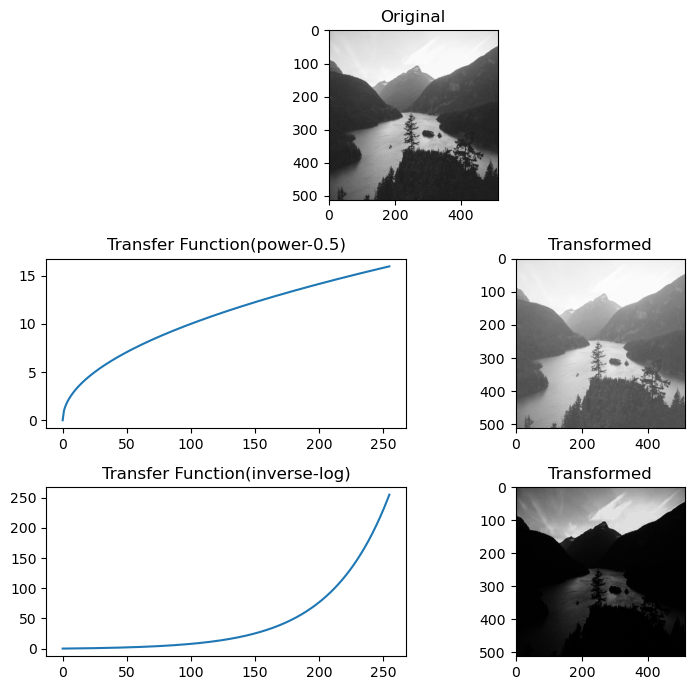

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def make_gray_image(image):
    gray_image = np.mean(image, axis=2).astype(np.uint8)
    return gray_image


def do_power_law(image, gamma):
    f_range = np.arange(0, 256)
    f_value = np.power(f_range, gamma)
    transformed_image = np.copy(image).astype(np.uint8)
    transformed_image = transformed_image/255.0
    # transformed_image = np.uint8(np.power(transformed_image, gamma) * 255)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            power_value = (transformed_image[i, j] ** gamma) * 255
            transformed_image[i, j] = np.uint8(power_value)
    return transformed_image, f_value, f_range


def do_inverse_log(image):
    log_image = np.copy(image).astype(np.uint8)
    log_image = log_image/255.0

    f_range = np.arange(0, 256)
    scalling_factor = 255.0 / np.log(1 + 255)
    # for log operation
    #f_value = scalling_factor * np.log(1 + f_range)
    #log_image = np.uint8(scalling_factor * np.log(1 + log_image))

    # for inverse log operation
    f_value = (np.exp(f_range) ** (1/scalling_factor)) - 1
    log_image = np.uint8(np.exp(log_image*255) ** (1/scalling_factor) - 1)

    return log_image, f_value, f_range


rgb_image = plt.imread('../images/landscape.jpg')
gray_image = make_gray_image(rgb_image)

power = 2
power_law_image, f_value, f_range = do_power_law(gray_image, power)
log_image, log_f_value, log_f_range = do_inverse_log(gray_image)


plt.figure(figsize=(8, 7))
plt.subplot(3, 2, (1, 2))
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.subplot(3, 2, 3)
plt.plot(f_range, f_value)
plt.title(f'Transfer Function(power-{power})')
plt.subplot(3, 2, 4)
plt.imshow(power_law_image, cmap='gray')
plt.title('Transformed')
plt.subplot(3, 2, 5)
plt.plot(log_f_range, log_f_value)
plt.title('Transfer Function(inverse-log)')
plt.subplot(3, 2, 6)
plt.imshow(log_image, cmap='gray')
plt.title('Transformed')

plt.tight_layout()
plt.show()